In [1]:
#Setup code
import sys
from pathlib import Path

# Ensure project root is on sys.path (notebooks are inside Notebooks/)
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

import numpy as np
import matplotlib.pyplot as plt

from src.models import (
    qm_correlation_exact, qm_correlation_mc,
    lhv_correlation, chsh, chsh_standard_angles
)


# Quantum Correlations for the Singlet State

## Aim
To compute the correlation function predicted by quantum mechanics for an entangled singlet pair and compare it with a local hidden-variable (LHV) model.

Quantum mechanics predicts:

$$
E_{\mathrm{QM}}(\theta) = -\cos(\theta)
$$

We then compute the CHSH parameter

$$
S = E(a,b)+E(a,b')+E(a',b)-E(a',b')
$$

and show that quantum mechanics can violate the local realist bound:

$$
|S| \le 2 \quad (\text{local realism}), \qquad |S| \le 2\sqrt{2} \quad (\text{quantum})
$$


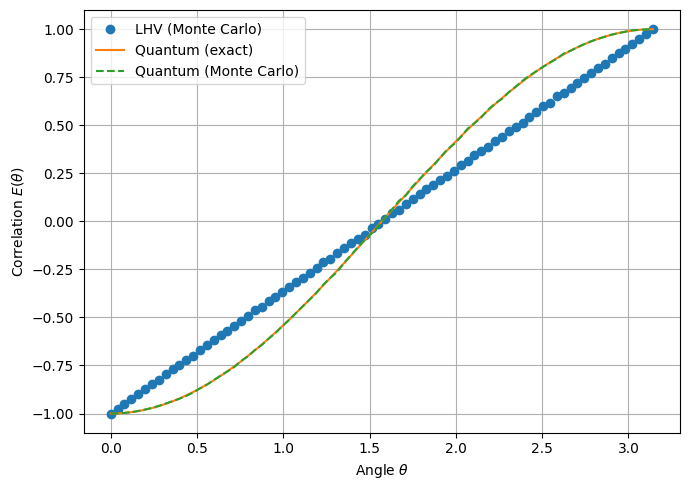

In [2]:
angles = np.linspace(0, np.pi, 80)

E_qm_exact = []
E_qm_mc = []
E_lhv_mc = []

for i, th in enumerate(angles):
    E_qm_exact.append(qm_correlation_exact(0.0, th))
    E_qm_mc.append(qm_correlation_mc(0.0, th, N=80_000, seed=200+i))
    E_lhv_mc.append(lhv_correlation(0.0, th, N=80_000, seed=100+i))

plt.figure(figsize=(7,5))
plt.plot(angles, E_lhv_mc, 'o', label='LHV (Monte Carlo)')
plt.plot(angles, E_qm_exact, '-', label='Quantum (exact)')
plt.plot(angles, E_qm_mc, '--', label='Quantum (Monte Carlo)')

plt.xlabel(r'Angle $\theta$')
plt.ylabel(r'Correlation $E(\theta)$')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("../figures/correlation_vs_angle.png", dpi=200)
plt.show()


In [3]:
a, ap, b, bp = chsh_standard_angles()

# Quantum exact
E_ab   = qm_correlation_exact(a, b)
E_abp  = qm_correlation_exact(a, bp)
E_apb  = qm_correlation_exact(ap, b)
E_apbp = qm_correlation_exact(ap, bp)
S_qm_exact = chsh(E_ab, E_abp, E_apb, E_apbp)

# Quantum MC
E_ab   = qm_correlation_mc(a, b, N=200_000, seed=10)
E_abp  = qm_correlation_mc(a, bp, N=200_000, seed=11)
E_apb  = qm_correlation_mc(ap, b, N=200_000, seed=12)
E_apbp = qm_correlation_mc(ap, bp, N=200_000, seed=13)
S_qm_mc = chsh(E_ab, E_abp, E_apb, E_apbp)

S_qm_exact, S_qm_mc


(-2.8284271247461903, -2.83033)

## Interpretation

- The quantum prediction $E_{\mathrm{QM}}(\theta)=-\cos\theta$ is smooth and purely geometric.
- The Monte Carlo quantum simulation reproduces the same curve because it samples outcomes consistent with the quantum disagreement probability.
- The local hidden-variable model does not match the cosine dependence and cannot reproduce the full quantum correlation structure.
- Using the same CHSH definition and the same measurement angles, quantum mechanics yields $|S|\approx 2\sqrt{2}$, violating the local realist bound $|S|\le 2$.
